In [30]:
import pandas as pd               # For data manipulation and analysis
from sklearn.model_selection import train_test_split # To split the data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler # To preprocess categorical and numerical features
from sklearn.ensemble import RandomForestClassifier   # A popular machine learning model
from sklearn.metrics import accuracy_score, classification_report # To evaluate the model's performance
import matplotlib.pyplot as plt  # For plotting the scatterplot
import numpy as np               # For numerical operations

In [31]:
# 1. Load and Prepare Data
# ---------------------------
data = pd.read_csv('weather_classification_data.csv')  # Read the CSV file into a Pandas DataFrame

# Feature Selection
# ------------------
features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Season', 'Atmospheric Pressure', 'UV Index', 'Location']  # Select the relevant features
X = data[features]  # Create a DataFrame containing only the selected features

# Encoding Categorical Features
# --------------------------------
label_encoder = LabelEncoder()  # Create a LabelEncoder instance
for col in ['Cloud Cover', 'Season', 'Location']:  # Encode categorical features using the LabelEncoder
    X[col] = label_encoder.fit_transform(X[col])

# Scaling Numerical Features
# ---------------------------
scaler = StandardScaler()      # Create a StandardScaler instance
X = scaler.fit_transform(X)   # Scale the numerical features to have zero mean and unit variance

# Target Variable (What to Predict)
# -----------------------------------
y = data['Weather Type']       # The target variable is 'Weather Type'

<ipython-input-31-1b382ad7683c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-31-1b382ad7683c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-31-1b382ad7683c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [32]:
# 2. Split Data into Training and Testing Sets
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% for training, 20% for testing


In [33]:

# 3. Train the Model (Random Forest)
# -------------------------------------
model = RandomForestClassifier()  # Create a RandomForestClassifier instance
model.fit(X_train, y_train)      # Train the model on the training data

RandomForestClassifier()

In [34]:
# 4. Make Predictions
# --------------------
y_pred = model.predict(X_test)   # Use the trained model to make predictions on the test data


In [35]:
# 5. Evaluate the Model
# -----------------------
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model
report = classification_report(y_test, y_pred) # Generate a classification report (precision, recall, F1-score)
print(f'Model Accuracy: {accuracy:.2f}')
print(report)


Model Accuracy: 0.90
              precision    recall  f1-score   support

      Cloudy       0.86      0.89      0.87       651
       Rainy       0.89      0.88      0.89       647
       Snowy       0.93      0.94      0.94       701
       Sunny       0.94      0.90      0.92       641

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.91      0.90      0.91      2640



In [36]:
# 6. Extract Temperature and Humidity Data
# -----------------------------------------
temperatures = data['Temperature']  # Get temperature values from the DataFrame
humidity = data['Humidity']        # Get humidity values from the DataFrame


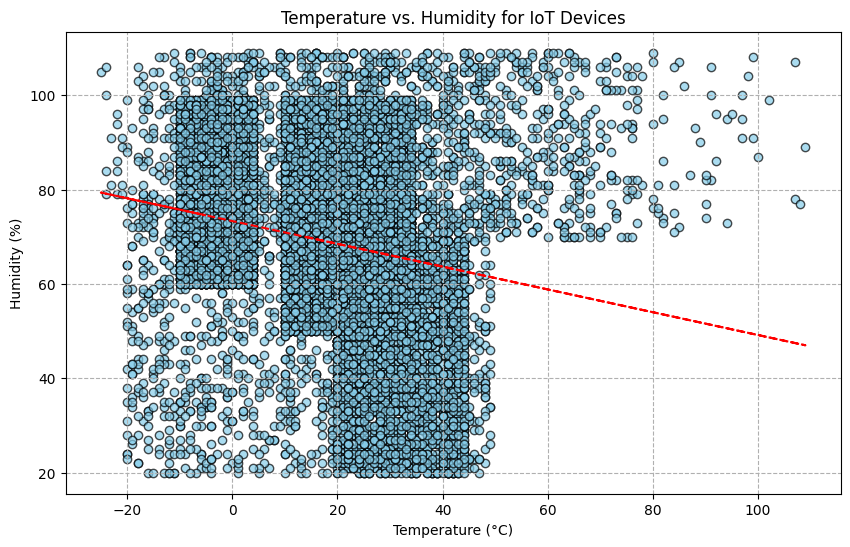

In [37]:
# 7. Create Scatter Plot
# ------------------------
plt.figure(figsize=(10, 6))       # Create a figure with specified size (optional)

# Plot Scatter Points
# --------------------
plt.scatter(temperatures, humidity, alpha=0.7, color='skyblue', edgecolors='black')
# Create a scatter plot with temperature on the x-axis and humidity on the y-axis
# alpha controls transparency, color sets the marker color, edgecolors outlines the markers

# Add Labels and Title
# ----------------------
plt.title('Temperature vs. Humidity for IoT Devices')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')

# Add Gridlines
# ---------------
plt.grid(axis='both', linestyle='--') # Add dotted gridlines for both axes

# (Optional) Add Trend Line (Linear Regression)
# ---------------------------------------------
z = np.polyfit(temperatures, humidity, 1)   # Fit a linear regression line to the data
p = np.poly1d(z)                            # Create a polynomial function from the coefficients
plt.plot(temperatures, p(temperatures), "r--") # Plot the trend line as a red dashed line

# Show the Plot
# --------------
plt.show()